### 목차

1. 통계 검정의 이해                         - ch.3-2
2. 상관계수 검정                            - ch.3-2
3. 두 그룹 평균 차이 검정(t검정)               - ch.3-3
4. 세 그룹 이상 평균 차이 분석(분산분석)         - ch.3-4
5. 범주형 변수의 교차표와 독립성 검정(카이제곱검정) - ch.3-5

### 목표 
1. 통계 검정의 종류들에 대해 이해한다.
2. 상황마다 적절한 통계 검정에 대해 정리한다.

## 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

# 그래프 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 과학 라이브러리
from scipy import stats # 검정에 활용

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# e : 10의 지수승 
print(1e-1)
print(30e-3)
print(3.14e+4)

0.1
0.03
31400.0


<br>
<br>

## 예제 및 실습 데이터 불러오기

In [3]:
# 보험 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')

print(df_ins.shape)
df_ins.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 수치형 변수들의 기초통계량 확인


In [5]:
# 변수들의 데이터타입 확인


In [6]:
# 성적 데이터 불러오기
df_sp = pd.read_csv('data/StudentsPerformance.csv')

print(df_sp.shape)
df_sp.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# 아빠키 아들키 불러오기
df_heights = pd.read_csv('data/heights.csv')

print(df_heights.shape)
df_heights.head()

(1078, 2)


,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070


<br>

## 1. 통계 검정의 이해  

### 1.1. 일표본 평균 검정 예제

p-value(유의확률)의 계산과 단측 검정/양측 검정의 이해

#### 1.1.1. 가설 설정 및 유의수준 지정

+ 가설 설정
    + $H_0$: 아들키의 평균은 174이다.  
    + $H_1$: 아들키의 평균은 174보다 크다.

+ 유의 수준(해당 업계/학계의 통용 기준을 활용)
    + 일반적으로 0.05로 설정

#### 1.1.2. 기술 통계량 계산

In [8]:
# 관측치 수
df_heights['son'].count()

1078

In [9]:
df_heights['son']

0       151.836806
1       160.563662
2       160.889747
3       159.492645
4       163.274070
           ...    
1073    179.710893
1074    173.400060
1075    176.036961
1076    176.027055
1077    170.218100
Name: son, Length: 1078, dtype: float64

In [10]:
# 데이터의 아들키 평균(174.45)
df_heights['son'].mean()
# np.mean(df_heights['son'])

174.45753692820037

In [11]:
# 표준 편차
df_heights['son'].std()
# np.std(df_heights['son'], ddof=1)

7.1493420461869

#### 1.1.3. 랜덤 키 데이터를 활용한 분포 생성

numpy의 **random** 모듈의 normal()함수를 활용하여 $H_0$ 기준 가짜 아들키 데이터 10,000개 생성 후 평균 분포 확인 가능

In [12]:
h_cnt  = df_heights['son'].count()
h_cnt

1078

In [13]:
h_mean = df_heights['son'].mean() 
h_mean

174.45753692820037

In [14]:
h_std  = df_heights['son'].std()  
h_std

7.1493420461869

In [15]:
# 아들 키가 174라는 가정하에 랜덤으로 아들키 1,078개 생성(가짜 데이터 생성)
# np.random.normal(평균, 표준편차, 샘플의 사이즈)
print(len(np.random.normal(174, h_std, h_cnt)))
np.random.normal(174, h_std, h_cnt)

1078


array([168.34753832, 173.94225069, 165.57407189, ..., 180.88824915,
       158.31458583, 175.27936418])

In [16]:
# 가짜 데이터의 평균 값 계산 
np.random.normal(174, h_std, h_cnt).mean()

174.04948021053454

In [17]:
# 위의 작업(가짜 데이터 생성)을 10,000번 반복하고 평균 확인
fake_means = []

for i in range(10000):
    fake_means.append(np.random.normal(174, h_std, h_cnt).mean())

In [18]:
# 10개만 확인해보면, 대부분 174 근처의 값들이라는 것을 확인할 수 있다.
fake_means[:10]

[174.2098325906739,
 173.91573145563208,
 174.41646304756514,
 174.24969066600656,
 173.63460377107504,
 173.6759151428764,
 173.76171704929095,
 173.99291943989263,
 173.98479653943153,
 173.9040178488637]

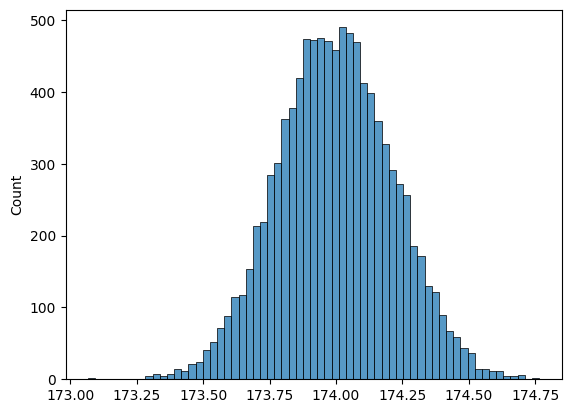

In [19]:
# 히스토그램을 활용한 분포 확인
sns.histplot(x = fake_means)
plt.show();

In [20]:
# 실제 아들키 평균
h_mean

174.45753692820037

In [21]:
# 가짜 평균과 실제 평균의 비교
# 가짜 평균 10,000개 중에서 실제 평균보다 큰 것의 개수
np.sum(np.array(fake_means) >= h_mean)

174

In [22]:
# 해석 : 가짜 평균 데이터(10,000개) 중 실제 평균키인 174.45보다 큰 것은 1xx개밖에 없음.
#       => 키가 174.45가 우연히 나올 확률은 매우 희박하다. 

In [23]:
# p-value 계산
# 귀무가설(키 평균이 174) 기준으로 실제 데이터의 평균 174.45가 나올 확률
np.sum(np.array(fake_means) >= h_mean)/10000

0.0174

In [24]:
# 1.78% => p-value < 0.05 => 귀무가설 기각. "아들키의 평균은 174보다 크다고 할 수 있다"
# 만약 10%이었다면 => p-value > 0.05 => 귀무가설을 기각할 수 없다. 174보다 크다고 말할 수 없다.

##### [결론] 
p-value가 0.0xxx로 유의수준 0.05보다 작으므로 $H_1$을 선택  
> "아들키의 평균은 174보다 크다고 할 수 있다"

## 2. 상관계수 검정

In [25]:
# 키 데이터
df_heights.head()

,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070


In [26]:
# pandas의 corr()을 활용한 상관계수 계산
df_heights.corr()

,father,son
father,1.000000,0.501338
son,0.501338,1.000000


In [27]:
# numpy의 corrcoef()를 활용한 상관계수 계산
np.corrcoef(df_heights['father'], df_heights['son'])

array([[1.        , 0.50133831],
       [0.50133831, 1.        ]])

<br>

### t분포를 활용한 상관분석


상관계수와 관측치 수를 활용해서 t값을 계산하고 t분포를 활용해서 p-value를 계산 가능

In [28]:
# 실제 상관계수 계산
corr_actual = np.corrcoef(df_heights['father'], df_heights['son'])[0, 1]
corr_actual

0.5013383111723433

In [29]:
val_n = df_heights['father'].count()
val_n

1078

In [30]:
# 수식에 따라 t값 계산
t_actual = np.sqrt(val_n-2)*corr_actual / np.sqrt(1-corr_actual**2)
t_actual

19.006175890429613

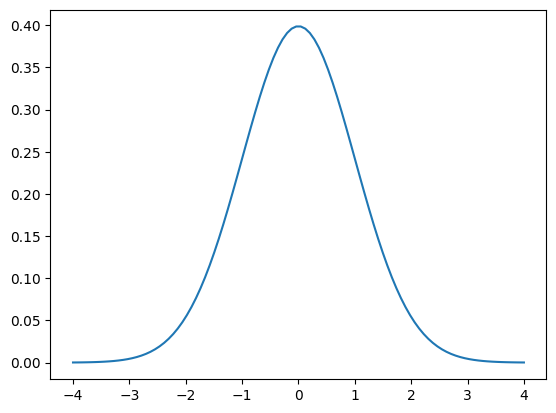

In [31]:
# (참고)t분포 확인
x = np.linspace(-4, 4, 100)
rv = stats.t(df=val_n - 2)
sns.lineplot(x=x, y=rv.pdf(x))

plt.show();

In [32]:
# p-value 계산
(1 - rv.cdf(t_actual))*2

0.0

In [33]:
# 귀무가설 기준으로 상관계수 0.5가 나올 확률은 0.00.......... 이다.
# 즉, 아버지와 아들의 키의 상관계수 0.5는 유의미하다.

<br>

### scipy를 활용한 상관분석

scipy의 stats 모듈을 활용해 상관분석 가능

In [34]:
# 상관계수 계산 및 p-value 계산
res = stats.pearsonr(df_heights['father'], df_heights['son'])
res

PearsonRResult(statistic=0.5013383111723431, pvalue=1.1212675496318386e-69)

In [35]:
# 상관계수의 95% 신뢰구간
res.confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=0.455258567454338, high=0.5447395729096159)

In [36]:
# 95% 신뢰구간의 의미 : 
# 실제 모집단 상관계수가 0.46~0.54 사이에 떨어질 확률이 95%라는 뜻

> **[해석]**  
> 유의수준 0.05에서 p-value가 유의수준보다 작으므로 귀무가설을 기각할 수 있다.  
> 따라서 아빠키와 아들키는 유의미한 양의 상관을 가진다고 할 수 있다.  

<br>
<hr>
<br>

## 3. 두 그룹 평균 차이 검정(t검정)

+ 가설 설정
    + $H_0: \mu_X = \mu_Y$    (두 그룹 $X$, $Y$의 평균이 같다.)
    + $H_0: \mu_X \neq \mu_Y$    (두 그룹 $X$, $Y$의 평균이 다르다.)

+ 유의수준 설정: 0.05
+ 정규성 검정(생략)
+ 검정 방법 선택
    + 독립표본 t검정 활용

In [37]:
print(df_heights.shape)
df_heights.head(3)

(1078, 2)


,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747


In [38]:
# 세대별 키 평균 계산
df_heights.mean()

father    171.925226
son       174.457537
dtype: float64

In [39]:
# 기초통계량은 describe 함수로도 구할 수 있다.
df_heights.describe()

,father,son
count,1078.000000,1078.000000
mean,171.925226,174.457537
std,6.971966,7.149342
min,149.880320,148.607983
25%,167.100847,170.005331
50%,172.127164,174.284183
75%,176.791569,178.983564
max,191.602182,199.046567


In [40]:
# 정규성 검정을 통과했다고 가정
stats.ttest_ind(df_heights['father'], df_heights['son'])

Ttest_indResult(statistic=-8.325919805445935, pvalue=1.467507588054212e-16)

In [41]:
# 아빠들의 키와 아들들의 키의 차이에 대한 검정(T-test) 결과
# => "아빠키와 아들키에는 유의미한 차이가 있다고 할 수 있다."

#### [참고] 정규성 검정과 비모수 검정

In [42]:
# 각 변수의 정규성 검정
stats.shapiro(df_heights['son'])
# stats.shapiro(df_heights['father'])
    ## 아들 키는 정규성 가정을 충족하지 못함
    ## --> 분포 가정이 없는 Kruskal-Wallis 순위합 검정 수행

ShapiroResult(statistic=0.9964215755462646, pvalue=0.014193939976394176)

In [43]:
# 비모수 검정
stats.kruskal(df_heights['father'], df_heights['son'])
    ## "아빠키와 아들키에는 유의미한 차이가 있다고 할 수 있다."
    ## Kruskal-Wallis 검정은 세 그룹 이상의 평균 비교(ANOVA)에서도 활용

KruskalResult(statistic=64.2712657832806, pvalue=1.0841541123431389e-15)

<br>

#### [실습] 두 그룹의 평균 비교 및 검정
 
1. 아래의 명령어를 실행하고 '남자수학점수'와 '여자수학점수' 데이터를 생성
2. *np.mean()* 을 활용하여 성별 평균 수학점수를 각각 계산
3. *stats.ttest_ind()* 를 활용하여 두 그룹 평균 차이의 유의성에 대한 검정 수행

In [44]:
# 1. 아래의 명령어를 실행하고 '남자수학점수'와 '여자수학점수' 데이터를 생성
math_male = np.array(df_sp[df_sp['gender']=='male']['math score'])
math_female = np.array(df_sp[df_sp['gender']!='male']['math score'])

print(math_male[:10])
print(math_female[:10])

[47 76 40 64 58 40 78 88 46 66]
[72 69 90 71 88 38 65 50 69 18]


In [45]:
# 2. np.mean() 을 활용하여 성별 평균 수학점수를 각각 계산


In [46]:
# 3. stats.ttest_ind() 를 활용하여 두 그룹 평균 차이의 유의성에 대한 검정 수행


###  [참고] 대응 표본 t-검정

사전테스트점수-사후테스트점수 등 각 관측치의 두 변수값 차이에 대한 검정 
> "가족간 아빠, 아들 간에 유의미한 키 차이가 있는가?"

In [47]:
stats.ttest_rel(df_heights['father'], df_heights['son'])

Ttest_relResult(statistic=-11.78854903823701, pvalue=2.9572263692282554e-30)

In [48]:
# => 해석 : p-value가 0.05 이하이므로 유의미한 차이가 있다고 말할 수 있다.

<br>
<hr>
<br>

## 4.  세 그룹 이상 평균 차이 분석(분산분석)

수치형 변수와 범주형 변수의 관계를 파악하기 위해서 그룹별 평균을 계산하고 그룹별 상자그림을 그려서 분포를 비교  
그룹 간 평균이 유의미하게 다른지 확인하기 위해서 분산분석(ANOVA)를 활용

+ 가설 설정
    + $H_0: \mu_1 = \mu_2 = ... = \mu_k$  (모든 그룹의 평균이 동일하다.)
    + $H_1: Not\,H_0$    (적어도 두 그룹의 평균이 다르다,)

+ 유의수준 설정: 0.05
+ 각 그룹별 정규성 검정(생략)
+ 등분산 검정
    + $H_0:$ 각 그룹의 분산이 모두 동일하다.  
    + $H_1: Not\,H_0 $  

+ 검정 방법 선택
    + F검정

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats # 검정에 활용

# 보험 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')

In [50]:
# 전체 평균
df_ins['charges'].mean()

13270.422265141257

In [51]:
# 그룹별 평균 계산
df_ins.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

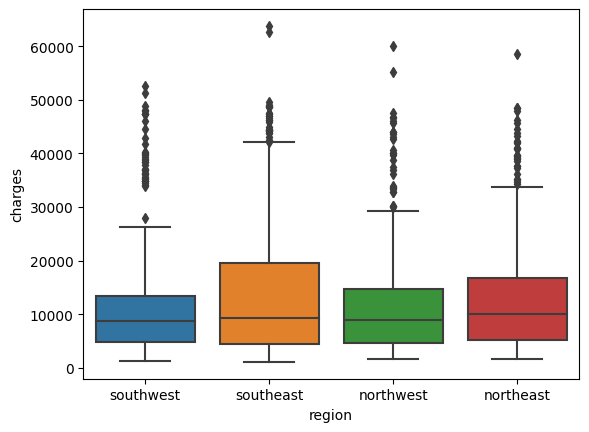

In [52]:
# 그룹별 상자그림
sns.boxplot(data=df_ins, x='region', y='charges')
plt.show();

<br>

### 4-1. scipy를 활용한 분산분석

scipy를 활용한 분산분석에서는 데이터를 그룹별로 분할한 다음, `f_oneway()`를 활용

### 문제 : 네 지역의 charges는 평균이 차이가 날까? => 세그룹 이상의 평균차이 분석 => anova(분산 분석)

In [53]:
# 지역별 데이터 분할
g1 = df_ins[df_ins['region']=='northeast']['charges']
g2 = df_ins[df_ins['region']=='northwest']['charges']
g3 = df_ins[df_ins['region']=='southeast']['charges']
g4 = df_ins[df_ins['region']=='southwest']['charges']

In [54]:
# 정규성 검정
stats.shapiro(g1), stats.shapiro(g2), stats.shapiro(g3), stats.shapiro(g4)
  ## p-value < 0.05
  ## "charges는 정규분포를 따르지 않는다고 할 수 있다." 
  ## "정규분포를 따르지 않는다고 할 수 있다" -> 비모수 검정
  ## 정규성 가정하고 아래의 등분산 검정 수행

(ShapiroResult(statistic=0.8353428840637207, pvalue=6.552730011610829e-18),
 ShapiroResult(statistic=0.8128032684326172, pvalue=4.268387928586811e-19),
 ShapiroResult(statistic=0.8242298364639282, pvalue=1.23268419436607e-19),
 ShapiroResult(statistic=0.7842952609062195, pvalue=2.023667803366432e-20))

In [55]:
# 등분산 검정
stats.bartlett(g1, g2, g3, g4)
    ## p-value < 0.05
    ## "분산이 다르다고 할 수 있다." -> Welch ANOVA 활용
    ## 등분산을 가정하고 아래의 ANOVA 수행

BartlettResult(statistic=25.882548015902767, pvalue=1.0092988086670753e-05)

In [56]:
# 분산분석(f_oneway 함수) 실행
stats.f_oneway(g1, g2, g3, g4)

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

> **[해석]**  
> (정규성과 등분산을 가정한 상태에서)  
> p < 0.05 \
> 네 지역의 charges의 평균에는 유의미한 차이가 있다고 할 수 있다.

<br>

### 4-2. statsmodels를 활용한 분산분석

매번 데이터를 분할하는 것은 쉽지 않기 때문에 **statsmodels** 라이브러리 활용 추천

In [57]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [58]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# C : Categorical(범주형) 변수 의미
model = ols("charges ~ C(region)", df_ins).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(region),3.0,1.300760e+09,4.335866e+08,2.969627,0.030893
Residual,1334.0,1.947735e+11,1.460071e+08,NaN,NaN


In [59]:
# 해석 : F값에 따른 p-value가 0.03 < 0.05 이므로, 
# 지역 별 평균 차이는 유의미하다.

### (교재) F값 계산(분산분석) 예제 - 팀 당 5명씩인 3팀 간 평균 비교

In [60]:
from scipy.stats import f

f_value = 1.08  # F값
dft = 2         # 그룹 간 자유도(k-1), # k는 그룹 수
dfe = 12        # 그룹 내 자유도(n-k)  # n은 관측치 수

p_value = f.sf(f_value, dft, dfe)
print("p-value:", p_value)

p-value: 0.3704315391783546


In [61]:
# 해석 : p-value > 0.05 이므로 귀무가설 채택(그룹 간 평균 차이가 유의미하지 않다)

<br>
<br>
<br>

#### [실습] 
1. 데이터 df_sp 에서 `gender`별 `math_score`의 평균을 계산하고 상자그림 그리기
2. 1의 두 변수를 활용해서 **statsmodels** 라이브러리로 분산분석 수행하기
3. 데이터 df_sp에서 `parental level of education`별 `reading_score`의 평균 계산하기
4. 3의 두 변수를 활용해서 **statsmodels**로 분산분석 수행하기


In [62]:
# C : Categorical(범주형) 변수 의미, 
# Q : 분산분석 시 ols에서 띄어쓰기가 있는 변수를 묶어주는 방법

<br>
<br>
<br>

## 5. 범주형 변수의 교차표와 독립성 검정(카이제곱검정)

범주형 변수의 교차표를 활용해 두 변수의 관계가 통계적으로 유의미한지 판단 가능

In [63]:
import numpy as np
import pandas as pd

# 그래프 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 과학 라이브러리
from scipy import stats # 검정에 활용

In [64]:
# 보험 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')

In [65]:
# 교차표
agg = pd.crosstab(df_ins['sex'], df_ins['smoker'])
agg

smoker,no,yes
sex,,
female,547,115
male,517,159


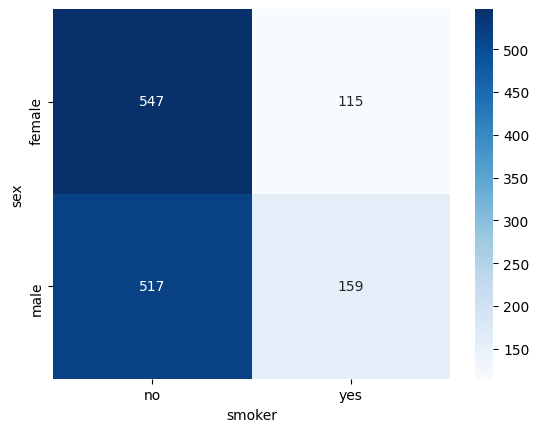

In [66]:
# 열지도(heatmap)
sns.heatmap(agg, cmap='Blues', annot=True, fmt='d')
plt.show();

In [67]:
# 행 백분율
pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='index', margins=True)

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207
All,0.795217,0.204783


In [68]:
# 열 백분율
pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='columns', margins=True)

smoker,no,yes,All
sex,,,
female,0.514098,0.419708,0.494768
male,0.485902,0.580292,0.505232


<br>

## 5.1. 카이제곱검정을 활용한 독립성 검정

scipy의 stats 모듈에서 *chi2_contingency()* 를 활용해 교차표의 두 범주형 변수에 대한 독립성 검정 실행

### 예시1) 성별에 따른 흡연여부에 차이가 있을까?

In [69]:
# 귀무 가설(H0) : 두 범주형 변수가 독립이다(상관 없다)
# 대립 가설(H1) : 두 범주형 변수가 독립이 아니다(상관이 있다)

In [70]:
# 위에서 구한 성별, 흡연여부에 따른 교차표
agg = pd.crosstab(df_ins['sex'], df_ins['smoker'])
agg

smoker,no,yes
sex,,
female,547,115
male,517,159


In [71]:
# 독립성 검정
chi2, p, dof, expected = stats.chi2_contingency(agg)

# print results
print('카이제곱 값:', chi2, '\n')   # 카이제곱값
print('p-value:', p, '\n')       # p-value
print('자유도:', dof, '\n')        # 자유도 = (2-1)x(2-1)
print('독립을 가정한 교차표:\n', expected) 

카이제곱 값: 7.39291081459996 

p-value: 0.006548143503580696 

자유도: 1 

독립을 가정한 교차표:
 [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


In [72]:
# 카이제곱검정의 자유도
# (r행과 c열이 있는 교차표의 경우) 자유도 = (r-1)x(c-1)

In [73]:
# 결과값의 분할 저장
# _ : 사용 안 할 변수를 저장하는 임시 변수
chi2val, pvalue, _, _ = stats.chi2_contingency(agg)

pvalue

0.006548143503580696

In [74]:
# 해석 : p-value가 0.05보다 작으므로, 성별과 흡연여부에 대해 유의미한 상관이 있다.

### 예시2) 성별에 따른 커피, 차 선호도에 유의미한 차이가 있을까?

In [75]:
# 귀무가설(H0) : 성별 간 커피, 차 선호도에 유의미한 상관이 없다.

In [76]:
import numpy as np
from scipy import stats

                  #커피 #차  
drinks = np.array([[30, 20],  # 남성
                   [40, 10]]) # 여성
drinks

array([[30, 20],
       [40, 10]])

In [77]:
# [[30, 20]   50
#  [40, 10]]  50
#   70  30    100

# 독립을 가정한 교차표
# [[35 15]  50   
#   35 15]] 50   
#   70 30   100  

In [78]:
# 카이제곱검정 수행
chi2, p, dof, expected = stats.chi2_contingency(drinks)

# print results
print('카이제곱 값:', chi2, '\n')   # 카이제곱값
print('p-value:', p, '\n')       # p-value
print('자유도:', dof, '\n')        # 자유도 = (2-1)x(2-1)
print('독립을 가정한 교차표:\n', expected) 

카이제곱 값: 3.8571428571428577 

p-value: 0.04953461343562649 

자유도: 1 

독립을 가정한 교차표:
 [[35. 15.]
 [35. 15.]]


In [79]:
# 해석 : p-value < 0.05 이므로, 귀무가설을 기각한다.
# 즉, 남성과 여성 사이에 커피/차 선호도에 유의미한 차이가 있다.

<br>
<br>

#### [실습] 두 범주형 변수의 독립성 검정 

1. df_sp에서 'race/ethnicity'와 'parental level of education'의 교차표 만들기
2. 1의 교차표에서 열지도 그리고 의미 파악하기
3. 1의 교차표와 `chi2_contingency()`로 'race/ethnicity'와 'parental level of education'의 독립성 검정하기





#### End of script